In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
import seaborn as sns

# Data Import

In [2]:
df=pd.read_csv("diamonds.csv", error_bad_lines=False)
df.drop(columns=['Unnamed: 0'], inplace=True)

/var/folders/sc/m38hzk_90cn6t0363cr74ny40000gn/T/ipykernel_46229/2632707547.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("diamonds.csv", error_bad_lines=False)


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


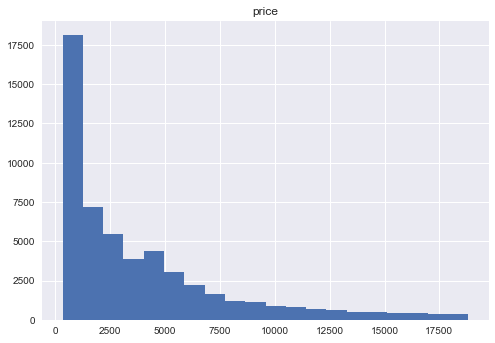

In [5]:
df.hist(column='price', bins=20)
plt.show()

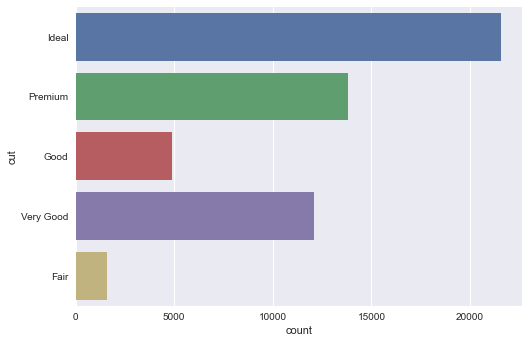

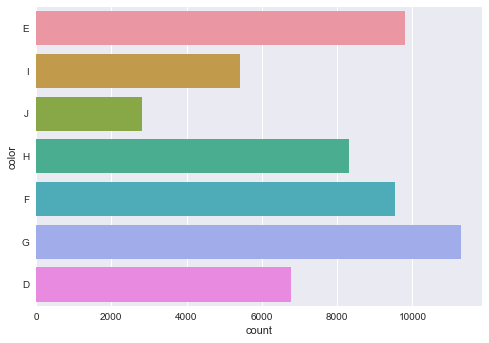

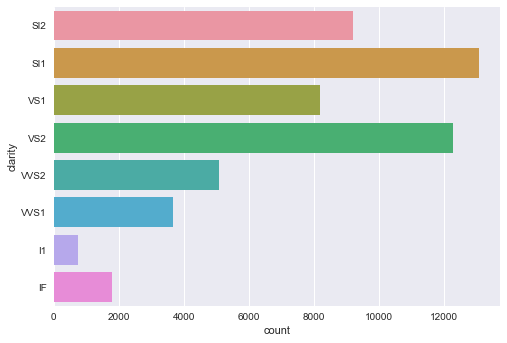

In [6]:
for feature in df.dtypes[df.dtypes == object].index:
    sns.countplot(y= feature, data= df)
    plt.show()

# Data Preprocessing

In [7]:
for i in ['x', 'y', 'z', 'carat']:
    print(df[df[i]==0].shape)

(8, 10)
(7, 10)
(20, 10)
(0, 10)


In [8]:
df.shape

(53940, 10)

In [9]:
df[(df['x']==0)|(df['y']==0)|(df['z']==0)].shape

(20, 10)

In [10]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]
df.shape

(53920, 10)

In [11]:
df["volume"] = df["x"] * df["y"] * df["z"]
df["density"] = df["carat"]*0.2/df["volume"]

<AxesSubplot:xlabel='count', ylabel='clarity'>

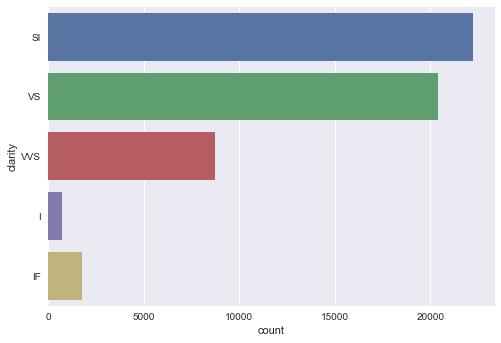

In [12]:
df.clarity.replace(["VVS1", "VVS2"], "VVS", inplace=True)
df.clarity.replace(["VS1", "VS2"], "VS", inplace= True)
df.clarity.replace(["SI1", "SI2"], "SI", inplace= True)
df.clarity.replace("I1", "I", inplace= True)

sns.countplot(y="clarity", data= df)

In [13]:
color_grades = {
    "Colorless": ["D", "E", "F"],
    "Near Colorless": ["G", "H", "I", "J"],
    "Faint Yellow": ["K", "L", "M"],
    "Very Light Yellow": ["N", "O", "P", "Q", "R"],
    "Light Yellow": ["S", "T", "U", "V", "W", "X", "Y", "Z"]
}

color_grades2 = {}

for key, item in color_grades.items():
    for i in item:
        color_grades2[i] = key

<AxesSubplot:xlabel='count', ylabel='colorgrade'>

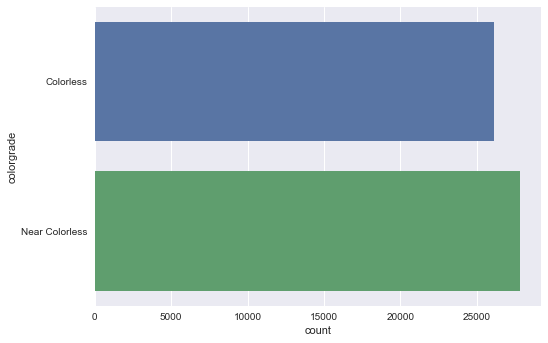

In [14]:
df['colorgrade'] = df['color'].map(color_grades2)

sns.countplot(y="colorgrade", data= df)

In [15]:
df2 = pd.get_dummies(df,columns=['cut', 'color', 'clarity','colorgrade'], drop_first=True)
df2.head()

,carat,depth,table,price,x,y,z,volume,density,cut_Good,...,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI,clarity_VS,clarity_VVS,colorgrade_Near Colorless
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.001204,0,...,0,0,0,0,0,0,1,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.001217,0,...,0,0,0,0,0,0,1,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.001208,1,...,0,0,0,0,0,0,0,1,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.001241,0,...,0,0,0,1,0,0,0,1,0,1
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.001194,1,...,0,0,0,0,1,0,1,0,0,1


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)
df3 = pd.DataFrame(df_scaled, index=df2.index, columns=df2.columns)
df3.head()

,carat,depth,table,price,x,y,z,volume,density,cut_Good,...,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI,clarity_VS,clarity_VVS,colorgrade_Near Colorless
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,-1.172291,-0.600011,-0.316234,...,-0.463581,-0.51445,-0.426481,-0.334328,-0.234389,-0.185303,1.193142,-0.780861,-0.439227,-1.032080
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,-1.219546,-0.232588,-0.316234,...,-0.463581,-0.51445,-0.426481,-0.334328,-0.234389,-0.185303,1.193142,-0.780861,-0.439227,-1.032080
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,-1.173891,-0.488674,3.162213,...,-0.463581,-0.51445,-0.426481,-0.334328,-0.234389,-0.185303,-0.838123,1.280637,-0.439227,-1.032080
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,-1.063334,0.446318,-0.316234,...,-0.463581,-0.51445,-0.426481,2.991071,-0.234389,-0.185303,-0.838123,1.280637,-0.439227,0.968918
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,-0.996948,-0.878989,3.162213,...,-0.463581,-0.51445,-0.426481,-0.334328,4.266413,-0.185303,1.193142,-0.780861,-0.439227,0.968918


# Feature Importance

In [17]:
X = df3.drop(columns=['price'])
y = df3['price']

In [18]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [19]:
estimator = RandomForestRegressor()
selector = RFE(estimator, verbose=True, n_features_to_select=5)
selector = selector.fit(X, y)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [20]:
X_selected = X[selector.get_feature_names_out()]
X_selected.head()

,carat,y,volume,density,clarity_SI
0,-1.198204,-1.539219,-1.172291,-0.600011,1.193142
1,-1.240417,-1.662014,-1.219546,-0.232588,1.193142
2,-1.198204,-1.460280,-1.173891,-0.488674,-0.838123
3,-1.071566,-1.319943,-1.063334,0.446318,-0.838123
4,-1.029353,-1.214690,-0.996948,-0.878989,1.193142


In [21]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_selected, y)

RandomForestRegressor(random_state=0)

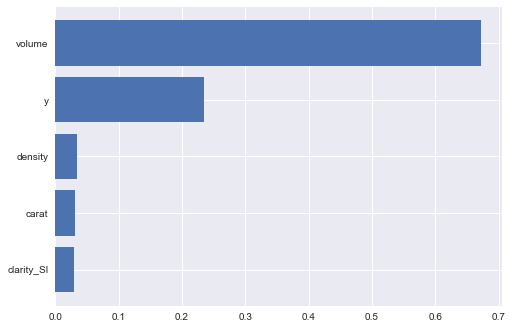

In [22]:
df_feature = pd.DataFrame(zip(selector.get_feature_names_out(),forest.feature_importances_), columns=['Feature', 'Importance']).sort_values('Importance')
plt.barh(df_feature.Feature, df_feature.Importance)
plt.show()

In [23]:
features = df_feature[df_feature['Importance']>0.01]['Feature'].tolist()

In [24]:
X_features = X[features]

# Modeling

In [25]:
from xgboost import XGBRegressor

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.25, random_state=42)

In [27]:
model = XGBRegressor(eval_metric='mae')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
import math 
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

0.08852343499353162
0.2975288809402066


In [30]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.1610888368923911


# CNN

https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html

In [38]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

In [39]:
X = df2.drop(columns=['price'])
y = df2['price']

In [40]:
x = X.values.reshape(X.shape[0], X.shape[1], 1)
print(x.shape)

(53920, 23, 1)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
model = Sequential([
Conv1D(64, 2, activation="relu", input_shape=(23, 1)),
Dense(32, activation='relu'),
Flatten(),
Dropout(0.25, name="dropout1"),
Dense(128, activation='relu'),
Dropout(0.25, name="dropout2"),
Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 22, 64)            192       
                                                                 
 dense_3 (Dense)             (None, 22, 32)            2080      
                                                                 
 flatten_1 (Flatten)         (None, 704)               0         
                                                                 
 dropout1 (Dropout)          (None, 704)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               90240     
                                                                 
 dropout2 (Dropout)          (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [43]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
METRICS = [tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None)]
model.compile(loss='mse', optimizer='rmsprop', metrics=METRICS)

In [44]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/100
1295/1295 [==============================] - 4s 2ms/step - loss: 3618735.7500 - mean_absolute_error: 1151.7512 - val_loss: 9125672.0000 - val_mean_absolute_error: 818.4738
Epoch 2/100
1295/1295 [==============================] - 3s 2ms/step - loss: 2462390.5000 - mean_absolute_error: 912.7097 - val_loss: 11391208.0000 - val_mean_absolute_error: 873.9557
Epoch 3/100
1295/1295 [==============================] - 3s 2ms/step - loss: 2244505.7500 - mean_absolute_error: 870.3547 - val_loss: 10624791.0000 - val_mean_absolute_error: 759.4993
Epoch 4/100
1295/1295 [==============================] - 3s 2ms/step - loss: 2205796.2500 - mean_absolute_error: 852.0938 - val_loss: 10338223.0000 - val_mean_absolute_error: 691.9411


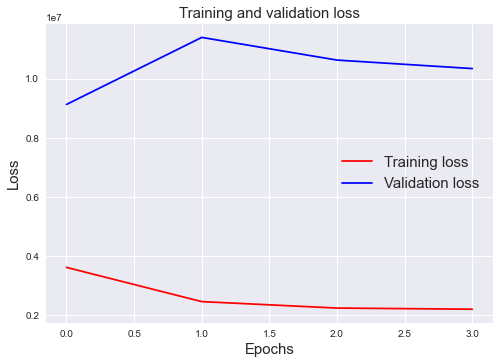

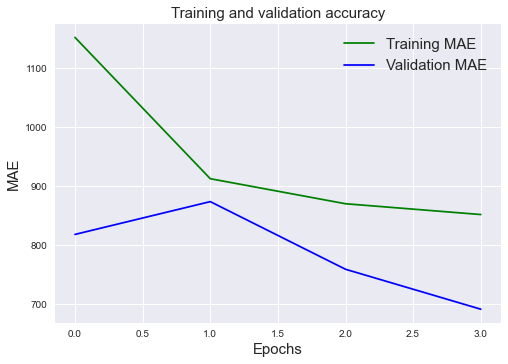

In [45]:
history_dict = history.history

acc = history_dict['mean_absolute_error']
val_acc = history_dict['val_mean_absolute_error']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training MAE')
plt.plot(epochs, val_acc, 'b', label='Validation MAE')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('MAE', size=15)
plt.legend(prop={'size': 15})
# plt.ylim((0.5,1))
plt.show()

In [46]:
print(model.evaluate(x_train, y_train))

1348/1348 [==============================] - 2s 1ms/step - loss: 2698970.7500 - mean_absolute_error: 755.0973
[2698970.75, 755.0972900390625]


In [47]:
ypred = model.predict(x_test)

337/337 [==============================] - 0s 1ms/step


In [48]:
print("MAE: %.4f" % mean_absolute_error(y_test, ypred))

MAE: 750.4211


# LSTM

In [53]:
X = df2.drop(columns=['price'])
y = df2['price']

In [61]:
x = X.values.reshape(X.shape[0], X.shape[1], 1)
print(x.shape)

(53920, 23, 1)


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True, dropout=0.5, input_shape=(x_train.shape[1], x_train.shape[-1]))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.5)),
    tf.keras.layers.Dense(1)
])

In [64]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
METRICS = [tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None)]
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=METRICS)

In [66]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/100
1295/1295 [==============================] - 32s 20ms/step - loss: 31072288.0000 - mean_absolute_error: 3910.9778 - val_loss: 32585402.0000 - val_mean_absolute_error: 3991.9907
Epoch 2/100
1295/1295 [==============================] - 26s 20ms/step - loss: 31030238.0000 - mean_absolute_error: 3905.5896 - val_loss: 32550606.0000 - val_mean_absolute_error: 3987.6296
Epoch 3/100
1295/1295 [==============================] - 27s 21ms/step - loss: 30996746.0000 - mean_absolute_error: 3901.2981 - val_loss: 32516858.0000 - val_mean_absolute_error: 3983.3926
Epoch 4/100
1295/1295 [==============================] - 31s 24ms/step - loss: 30963884.0000 - mean_absolute_error: 3897.0789 - val_loss: 32483346.0000 - val_mean_absolute_error: 3979.1897
Epoch 5/100
1295/1295 [==============================] - 39s 30ms/step - loss: 30931048.0000 - mean_absolute_error: 3892.8867 - val_loss: 32449848.0000 - val_mean_absolute_error: 3974.9824
Epoch 6/100
1295/1295 [==============================] 

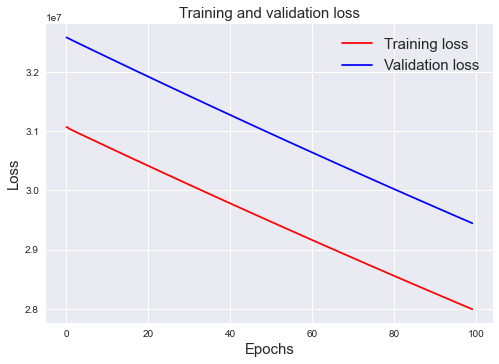

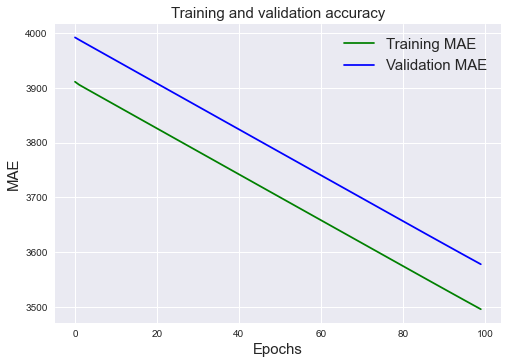

In [67]:
history_dict = history.history

acc = history_dict['mean_absolute_error']
val_acc = history_dict['val_mean_absolute_error']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training MAE')
plt.plot(epochs, val_acc, 'b', label='Validation MAE')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('MAE', size=15)
plt.legend(prop={'size': 15})
# plt.ylim((0.5,1))
plt.show()

In [68]:
print(model.evaluate(x_train, y_train))

1348/1348 [==============================] - 8s 6ms/step - loss: 28123222.0000 - mean_absolute_error: 3501.8044
[28123222.0, 3501.804443359375]


In [69]:
ypred = model.predict(x_test)

337/337 [==============================] - 3s 5ms/step


In [70]:
print("MAE: %.4f" % mean_absolute_error(y_test, ypred))

MAE: 3524.0264
